# Import Libraries 


In [97]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


# Reading Data


In [98]:
data = pd.read_csv('./adult.csv')

# Exploring Data

In [99]:
print("shape",data.shape)
data.head(5)

shape (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [101]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [102]:
data_null=data.isnull().sum()
print(data_null)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


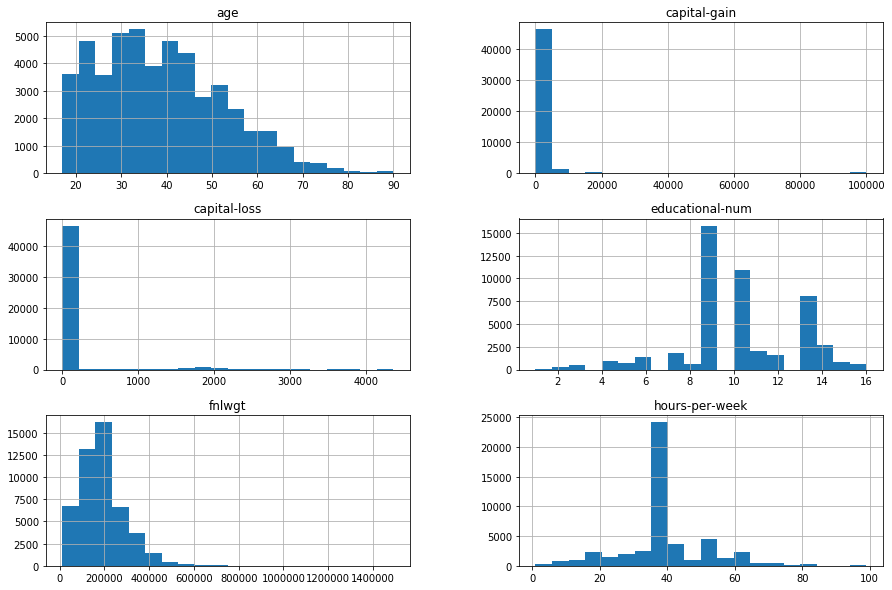

In [103]:
data.hist(bins=20, figsize=(15,10))
plt.show()

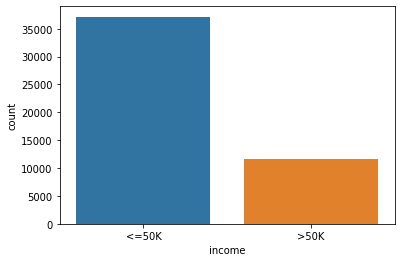

In [104]:
sns.countplot(x='income', data=data)

Text(0.5, 1, 'dataset correlation')

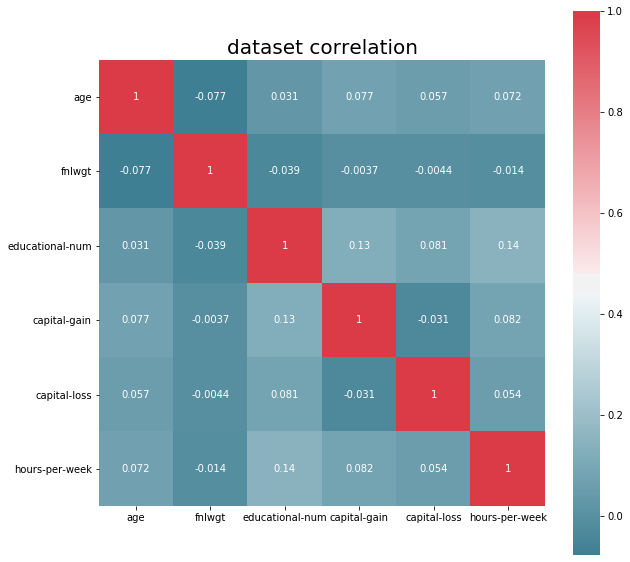

In [105]:
#Plotting the Correlation
f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [106]:
print('workclass',data.workclass.unique(),'\n')
print('education',data.education.unique(),'\n')
print('marital-status',data['marital-status'].unique(),'\n')
print('occupation',data.occupation.unique(),'\n')
print('relationship',data.relationship.unique(),'\n')
print('race',data.race.unique(),'\n')
print('gender',data.gender.unique(),'\n')
print('native-country',data['native-country'].unique(),'\n')
print('income',data.income.unique(),'\n')

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

gender ['Male' 'Female'] 

native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 

# Data Preprocessing

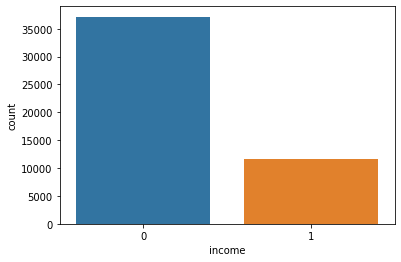

In [107]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
sns.countplot(x='income', data=data)

In [108]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




In [109]:
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]
data.shape


(45222, 15)

In [110]:
numerical_features = [x for x in data._get_numeric_data().columns if x not in ['income']]
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [111]:
for c in categorical_features:
    print (c)
    print (data[c].value_counts(),'\n')


workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64 

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64 

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64 

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         554

In [113]:
data['marital-status']=data['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
data['marital-status']=data['marital-status'].replace(['Never-married','Divorced','Separated','Widowed','Married-spouse-absent'], 'not-married')

data['education']=data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Assoc-voc','Assoc-acdm','Prof-school',],'pre-HS')
data['education']=data['education'].replace('HS-grad','HS')
data['education']=data['education'].replace(['Bachelors','Some-college'],'undergrad')
data['education']=data['education'].replace(['Masters','Doctorate'],'post-grad')


In [114]:
#ُEncoding categorical columns
data_onehot = pd.get_dummies(data, columns=categorical_features)

In [120]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,pre-HS,7,not-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,pre-HS,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,undergrad,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,pre-HS,6,not-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


# Splitting Data

In [121]:
train, test = train_test_split(data_onehot, test_size=0.3, random_state=50)
x_train = train.drop(columns='income')
y_train = train['income']

x_val = test.drop(columns='income')
y_val = test['income']


# Model

In [122]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1).fit(x_train, y_train)


In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
y_pred = dt.predict(x_val)
print('Classification Report:\n\n{}'.format(classification_report(y_val, y_pred)))
print('The accuracy of the DT is', accuracy_score(y_val, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10237
           1       0.62      0.65      0.63      3330

    accuracy                           0.81     13567
   macro avg       0.75      0.76      0.75     13567
weighted avg       0.82      0.81      0.82     13567

The accuracy of the DT is 0.8146237193189356
